# EDA (charts, distributions)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Visualization Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# Load Raw Dataset
df_raw = pd.read_csv("../data/raw/reviews/restaurants_reviews_raw.csv")
print(" Dataset size:", df_raw.shape)
print("\n First 5 lines:\n", df_raw.head())
print("\n Dataset information:\n")
print(df_raw.info())

 Dataset size: (132133, 24)

 First 5 lines:
   vendor_id       restaurant_name  \
0      wkgk  Mis Balık Restaurant   
1      wkgk  Mis Balık Restaurant   
2      wkgk  Mis Balık Restaurant   
3      wkgk  Mis Balık Restaurant   
4      wkgk  Mis Balık Restaurant   

                                                link  \
0  https://www.yemeksepeti.com/restaurant/wkgk/mi...   
1  https://www.yemeksepeti.com/restaurant/wkgk/mi...   
2  https://www.yemeksepeti.com/restaurant/wkgk/mi...   
3  https://www.yemeksepeti.com/restaurant/wkgk/mi...   
4  https://www.yemeksepeti.com/restaurant/wkgk/mi...   

                                                 img  rating review_count  \
0  https://images.deliveryhero.io/image/fd-tr/LH/...     3.5      (2000+)   
1  https://images.deliveryhero.io/image/fd-tr/LH/...     3.5      (2000+)   
2  https://images.deliveryhero.io/image/fd-tr/LH/...     3.5      (2000+)   
3  https://images.deliveryhero.io/image/fd-tr/LH/...     3.5      (2000+)   
4  https:

In [3]:
# Missing Data Analysis
missing_count = df_raw.isnull().sum()
missing_percent = (missing_count / len(df_raw)) * 100
missing_df = pd.DataFrame({"Number of missing": missing_count, "Missing %": missing_percent})
print("\n Missing data status:\n", missing_df)


 Missing data status:
                        Number of missing  Missing %
vendor_id                              0   0.000000
restaurant_name                        0   0.000000
link                                   0   0.000000
img                                    0   0.000000
rating                              1958   1.481840
review_count                        1958   1.481840
price_range                            0   0.000000
min_order                              0   0.000000
cuisine_type                           0   0.000000
delivery_time                        158   0.119576
delivery_type                       6370   4.820900
district                               0   0.000000
restaurant_slug                        0   0.000000
uuid                                   0   0.000000
reviewer_name                          0   0.000000
reviewer_id                            0   0.000000
overall_score                          0   0.000000
restaurant_food_score                  0

In [4]:
# Same Restaurant + Same UUID Check
dupes = df_raw.duplicated(subset=['vendor_id','uuid'], keep=False)
print("\n Number of duplicate reviews with the same UUID and vendor_id:", dupes.sum())


 Number of duplicate reviews with the same UUID and vendor_id: 113043


Number of unique restaurants: 1388


C:\Users\nurha\AppData\Local\Temp\ipykernel_15152\4199735924.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall_score', data=df_raw, palette="viridis")


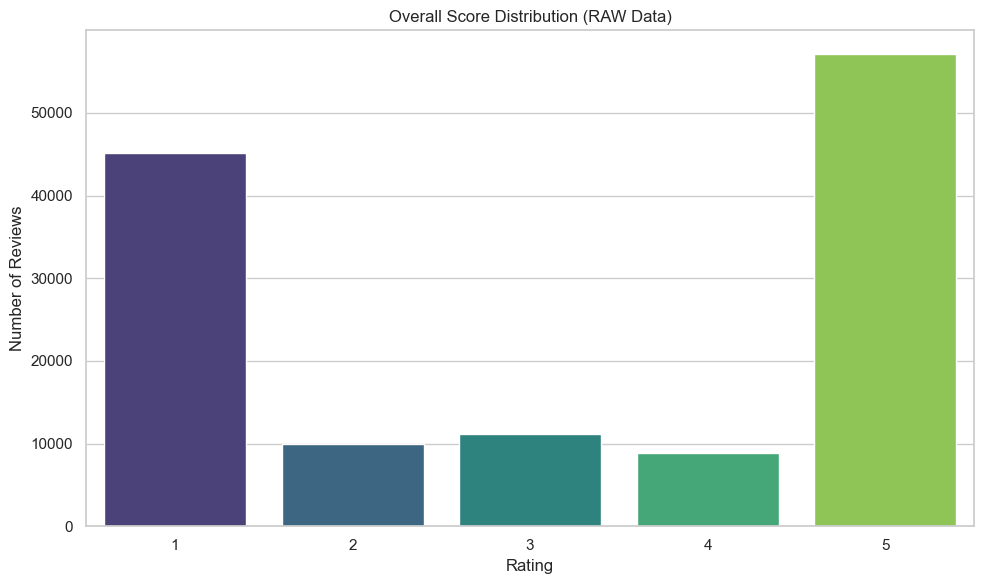

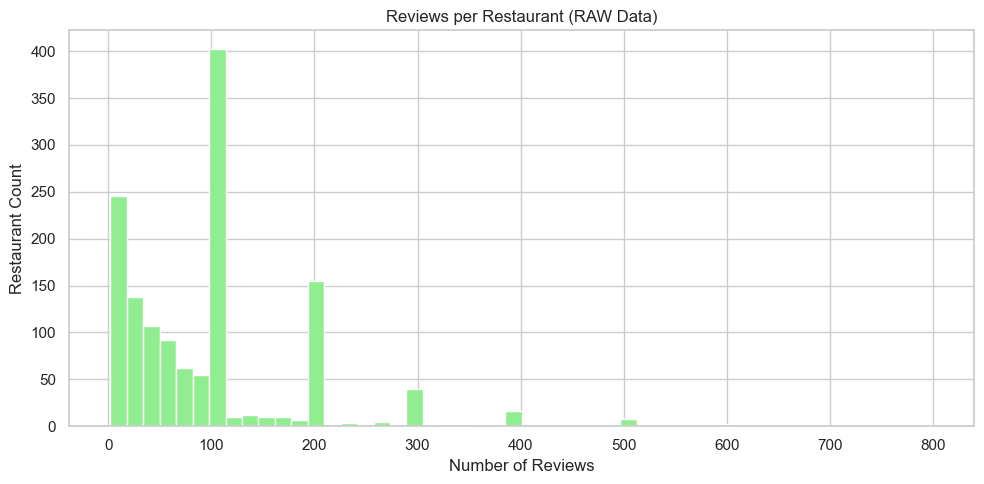

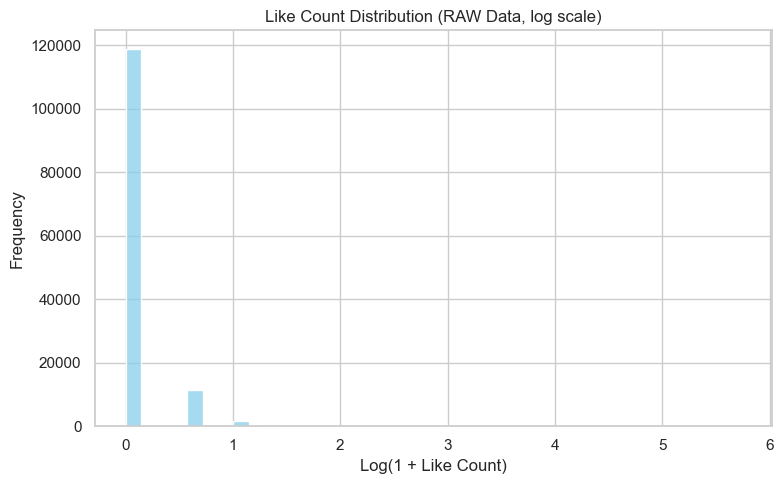


📌 Text length statistics (RAW):
 count    132133.000000
mean         80.272793
std          56.945423
min           1.000000
25%          34.000000
50%          65.000000
75%         118.000000
max         200.000000
Name: text_length, dtype: float64


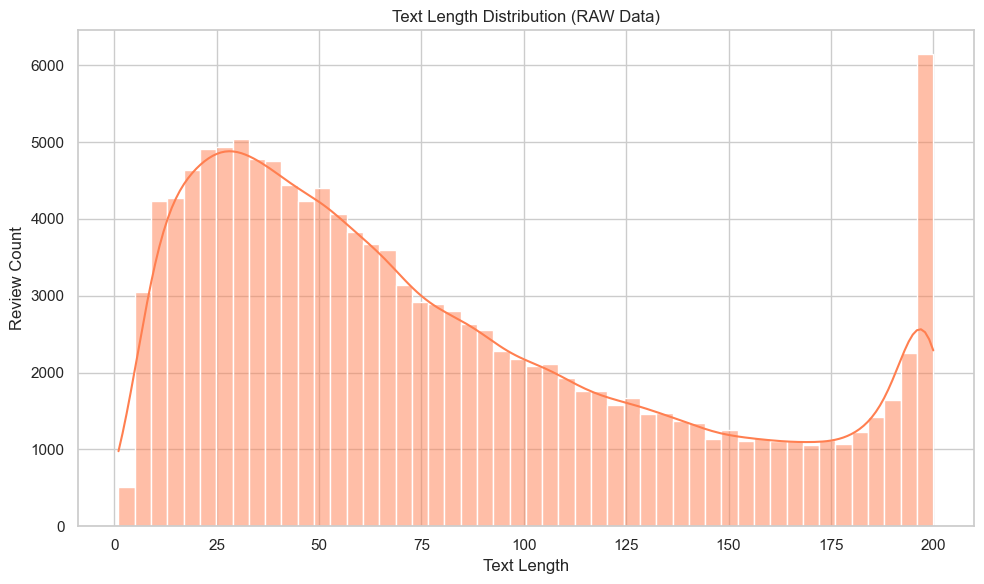

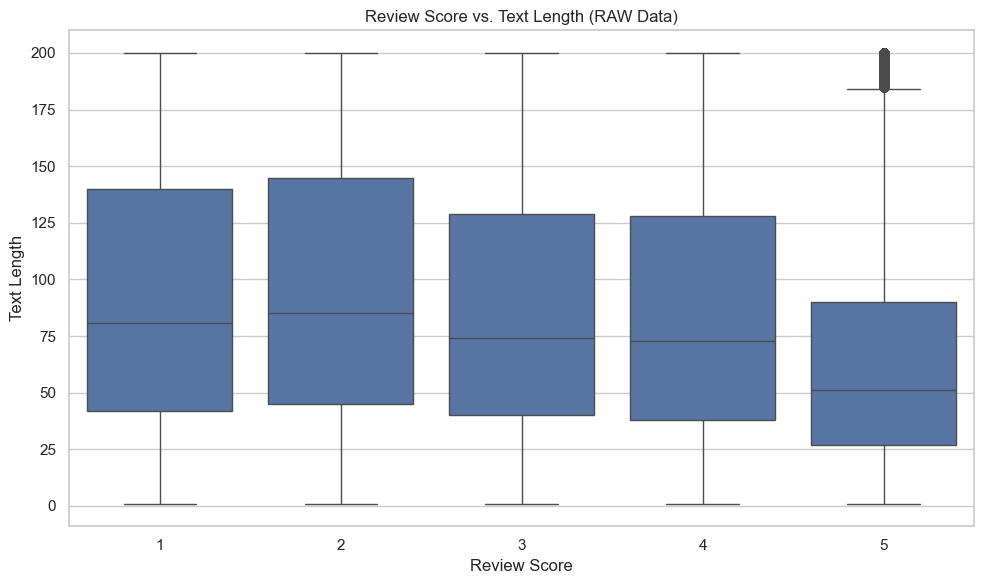

In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a RAW folder 
raw_dir = "../eda_graphs/raw"
os.makedirs(raw_dir, exist_ok=True)

# How many different restaurants are there
print("Number of unique restaurants:", df_raw['vendor_id'].nunique())

# Overall Score Distribution
plt.figure()
sns.countplot(x='overall_score', data=df_raw, palette="viridis")
plt.title("Overall Score Distribution (RAW Data)")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.savefig(os.path.join(raw_dir, "overall_score_distribution_raw.png"), dpi=300)
plt.show()

# Reviews per Restaurant
reviews_per_restaurant = df_raw.groupby("vendor_id")['text'].count()
plt.figure(figsize=(10,5))
reviews_per_restaurant.plot(kind='hist', bins=50, color='lightgreen')
plt.title("Reviews per Restaurant (RAW Data)")
plt.xlabel("Number of Reviews")
plt.ylabel("Restaurant Count")
plt.tight_layout()
plt.savefig(os.path.join(raw_dir, "reviews_per_restaurant_raw.png"), dpi=300)
plt.show()

# Like Count Distribution
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df_raw['like_count']), bins=40, color='skyblue')  # log1p -> log(1+x)
plt.title("Like Count Distribution (RAW Data, log scale)")
plt.xlabel("Log(1 + Like Count)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(os.path.join(raw_dir, "like_count_distribution_raw_log.png"), dpi=300)
plt.show()

# Text Length Analysis
df_raw['text_length'] = df_raw['text'].astype(str).apply(len)
print("\n📌 Text length statistics (RAW):\n", df_raw['text_length'].describe())

plt.figure()
sns.histplot(df_raw['text_length'], bins=50, kde=True, color='coral')
plt.title("Text Length Distribution (RAW Data)")
plt.xlabel("Text Length")
plt.ylabel("Review Count")
plt.tight_layout()
plt.savefig(os.path.join(raw_dir, "text_length_distribution_raw.png"), dpi=300)
plt.show()

# Average Score vs. Text Length
plt.figure()
sns.boxplot(x='overall_score', y='text_length', data=df_raw)
plt.title("Review Score vs. Text Length (RAW Data)")
plt.xlabel("Review Score")
plt.ylabel("Text Length")
plt.tight_layout()
plt.savefig(os.path.join(raw_dir, "score_vs_text_length_raw.png"), dpi=300)
plt.show()

In [5]:
# Summary
print("\n EDA Completed! Dataset properties and distributions were examined with the images and tables above.")


 EDA Completed! Dataset properties and distributions were examined with the images and tables above.


# Dataset cleaning


In [ ]:
import pandas as pd
import re

df = pd.read_csv(
    "../data/raw/reviews/restaurants_reviews_raw.csv",
    sep=',',
    encoding='utf-8-sig',
    quotechar='"',   # It correctly recognizes commas inside quotation marks.
    escapechar='\\'  # If there are escape characters, they will be featured.
)

print("Initial shape:", df_raw.shape)

# Fix missing values

# Rider score: missing → 0 (No rider review means...)
df_raw['rider_score'] = df_raw['rider_score'].fillna(0)

# Product names: missing → empty string
df_raw['product_names'] = df_raw['product_names'].fillna('')

# Delivery type: categorical → unknown
df_raw['delivery_type'] = df_raw['delivery_type'].fillna('unknown')

# Rating & review_count → vendor based median
df_raw['rating'] = df_raw.groupby('vendor_id')['rating'] \
    .transform(lambda x: x.fillna(x.median()))

df_raw['review_count'] = pd.to_numeric(
    df_raw['review_count']
        .astype(str)
        .str.replace(r'[^\d]', '', regex=True),
    errors='coerce'
)

# Delivery time normalize (example: "30-40 dk" → 35)
def parse_delivery_time(x):
    if pd.isna(x):
        return None
    nums = list(map(int, re.findall(r'\d+', str(x))))
    return np.mean(nums) if nums else None

df_raw['delivery_time_min'] = df_raw['delivery_time'].apply(parse_delivery_time)

df_raw['delivery_time_min'] = df_raw['delivery_time_min'].fillna(
    df_raw['delivery_time_min'].median()
)

# Datetime conversion
df_raw['created_at'] = pd.to_datetime(df_raw['created_at'], errors='coerce')

# Duplicate cleaning

# High score first
df_raw = df_raw.sort_values(
    by=['vendor_id', 'uuid', 'overall_score'],
    ascending=[True, True, False]
)

# Same user – same restaurant → keep best record
df_raw = df_raw.drop_duplicates(
    subset=['vendor_id', 'uuid'],
    keep='first'
)

print("After duplicate removal:", df_raw.shape)

# Sentiment labeling

def score_to_sentiment(score):
    if score <= 3:
        return "negative"
    else:
        return "positive"

df_raw['sentiment_label'] = df_raw['overall_score'].apply(score_to_sentiment)

df_raw['sentiment'] = df_raw['sentiment_label'].map({
    "positive": 1,
    "negative": 0
})

# Optional helper features

# Is there a courier rating system?
df_raw['has_rider_score'] = (df_raw['rider_score'] > 0).astype(int)

# Comment length (characters)
df_raw['review_length'] = df_raw['text'].astype(str).apply(len)

# Save processed dataset

OUTPUT_PATH = "../data/processed/restaurant_reviews_processed.csv"
df_raw.to_csv(OUTPUT_PATH, index=False, encoding="utf-8-sig")

# Final checks

print("Final shape:", df_raw.shape)
print("\nSentiment distribution:")
print(df_raw['sentiment_label'].value_counts())

print("\nMissing values (remaining):")
print(df_raw.isna().sum()[df_raw.isna().sum() > 0])

Initial shape: (132133, 24)
After duplicate removal: (59617, 25)
Final shape: (59617, 29)

Sentiment distribution:
sentiment_label
positive    30645
negative    28972
Name: count, dtype: int64

Missing values (remaining):
rating           695
review_count     695
delivery_time     79
dtype: int64


In [13]:
df_processed = pd.read_csv(
    "../data/processed/restaurant_reviews_processed.csv",
    parse_dates=['created_at'] # Ensure created_at is parsed as datetime
    )

print(df_processed.info())
print(df_processed.describe(include='all'))

duplicates = df_processed.duplicated(subset=['vendor_id', 'uuid'])
print(f"Number of duplicate records: {duplicates.sum()}")

print(df_processed['overall_score'].value_counts())

print(df_processed['sentiment'].value_counts())

print(df_processed['created_at'].min(), df_processed['created_at'].max())

print(df_processed.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59617 entries, 0 to 59616
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   vendor_id              59617 non-null  object             
 1   restaurant_name        59617 non-null  object             
 2   link                   59617 non-null  object             
 3   img                    59617 non-null  object             
 4   rating                 58922 non-null  float64            
 5   review_count           58922 non-null  float64            
 6   price_range            59617 non-null  object             
 7   min_order              59617 non-null  object             
 8   cuisine_type           59617 non-null  object             
 9   delivery_time          59538 non-null  object             
 10  delivery_type          59617 non-null  object             
 11  district               59617 non-null  object         

In [14]:
# General settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Overall Score distribution
plt.figure()
sns.countplot(x='overall_score', data=df_processed, palette='viridis')
plt.title("Overall Score Distribution")
plt.savefig("../eda_graphs/processed/overall_score_distribution.png")
plt.close()

# Sentiment distribution 
plt.figure()
sns.countplot(x='sentiment', data=df_processed, palette='coolwarm')
plt.title("Sentiment Distribution")
plt.savefig("../eda_graphs/processed/sentiment_distribution.png")
plt.close()

# Rider Score distribution 
plt.figure()
sns.histplot(df_processed['rider_score'], bins=6, kde=False, color='purple')
plt.title("Rider Score Distribution")
plt.savefig("../eda_graphs/processed/rider_score_distribution.png")
plt.close()

# Number of reviews per restaurant
restaurant_review = df_processed.groupby('restaurant_name')['uuid'].count().sort_values(ascending=False)
plt.figure()
plt.bar(restaurant_review.index[:50], restaurant_review.values[:50], color='green')  # Show top 50 restaurants
plt.xticks(rotation=90)
plt.title("Top 50 Restaurants by Number of Reviews")
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.savefig("../eda_graphs/processed/reviews_per_restaurant.png")
plt.close()

# Like Count distribution 
plt.figure()
plt.hist(df_processed['like_count'], bins=50, color='orange', log=True)  # We use log scale
plt.title("Distribution of Like Counts (log scale)")
plt.xlabel("Like Count")
plt.ylabel("Frequency (log)")
plt.tight_layout()
plt.savefig("../eda_graphs/processed/like_count_distribution.png")
plt.close()

# Number of comments based on date 
df_processed['year_month'] = df_processed['created_at'].dt.to_period('M')
monthly_counts = df_processed.groupby('year_month')['uuid'].count()
plt.figure()
monthly_counts.plot(kind='bar', color='teal')
plt.title("Monthly Number of Reviews")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.savefig("../eda_graphs/processed/monthly_reviews.png")
plt.close()

print("✅ Graphs are saved in the '../eda_graphs/processed' folder!")


C:\Users\nurha\AppData\Local\Temp\ipykernel_15152\1335124111.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall_score', data=df_processed, palette='viridis')
C:\Users\nurha\AppData\Local\Temp\ipykernel_15152\1335124111.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_processed, palette='coolwarm')


✅ Graphs are saved in the '../eda_graphs/processed' folder!


C:\Users\nurha\AppData\Local\Temp\ipykernel_15152\1335124111.py:49: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_processed['year_month'] = df_processed['created_at'].dt.to_period('M')
